# Tests for Bragg Edge fitting

Simple fitting using theoretical bragg edge spectrum of Iron and Santisteban formula
Fitting is made with lmfit (least-squares minimization)

In [15]:
import numpy as np
from numpy import pi, r_, math, random
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.special import erfc
from lmfit import Model
from lmfit import Parameters
from numpy import loadtxt
# %matplotlib inline
%matplotlib notebook

## This is the simple fitting formulation    
    term2 = erfc(-((t-t0)/(sigma * math.sqrt(2))) + sigma/alpha)
    term1 = np.exp((t-t0)/alpha + (sigma*sigma)/(2*alpha*alpha))
    term0 = erfc(-((t-t0)/(sigma*math.sqrt(2))))
    
    y = a1 + a2 * (term0 - (term1 * term2))   
    
    a1=offset
    a2=height
    

In [2]:
def term0(t,t0,sigma):
    return erfc(-((t-t0)/(sigma*math.sqrt(2))))

In [3]:
def term1(t,t0,alpha,sigma):
    return np.exp((t-t0)/alpha + (sigma*sigma)/(2*alpha*alpha))


In [4]:
def term2(t,t0,sigma,alpha):
    return erfc(-((t-t0)/(sigma * math.sqrt(2))) + sigma/alpha)

In [5]:
def BraggEdgeFit(t,t0,sigma,alpha,a2,a1):
    return(a1+a2*(term0(t,t0,sigma)-(term1(t,t0,alpha,sigma)*term2(t,t0,sigma,alpha))))

In [6]:
def BraggEdgeFitSimple(t,t0,sigma,alpha):
    return(0.5*(term0(t,t0,sigma)-(term1(t,t0,alpha,sigma)*term2(t,t0,sigma,alpha))))

In [7]:
gmodel = Model(BraggEdgeFitSimple)
# result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

In [8]:
myspectrum = loadtxt('/home/carminati_c/Documents/vel_selector/alpha.txt') 
# myspectrum = file.read() 

<IPython.core.display.Javascript object>


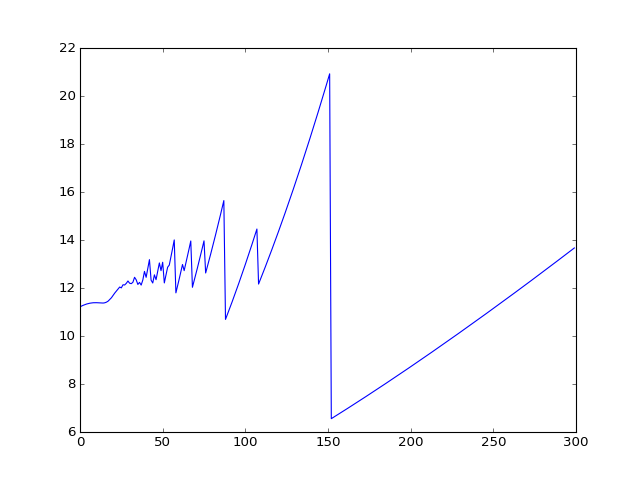

In [9]:
plt.figure
plt.plot(myspectrum)

<IPython.core.display.Javascript object>


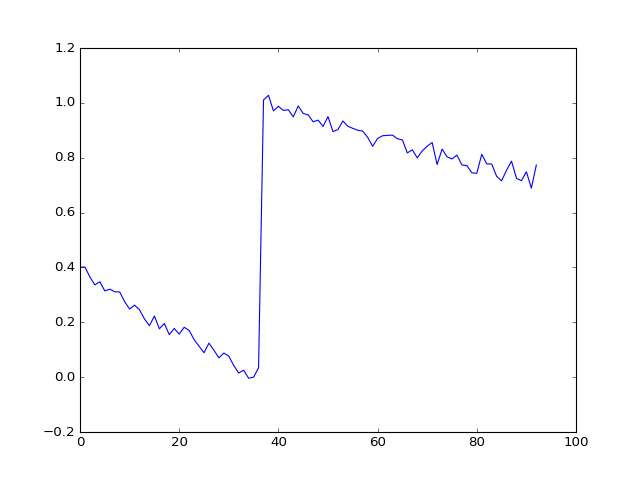

In [10]:
mybragg = -1*np.log10(myspectrum[115:208]/np.max(myspectrum[115:208]))
# mybragg = myspectrum[115:208]
mybragg = mybragg/np.max(mybragg)+ random.normal(0, 0.02, len(mybragg))
plt.plot(mybragg)

In [13]:
t=np.linspace(1,np.size(mybragg)-1,np.size(mybragg))

[[Model]]
    Model(BraggEdgeFitSimple)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 186
    # data points      = 93
    # variables        = 3
    chi-square         = 3.37216
    reduced chi-square = 0.03747
    Akaike info crit   = -302.48522
    Bayesian info crit = -294.88742
[[Variables]]
    t0:      36.5888084 +/- 7.11e+05 (1942085.52%) (init= 20)
    sigma:   0.02748617 +/- 1.05e+06 (3802497118.39%) (init= 0.1)
    alpha:  -0.06992515 +/- 2.68e+04 (38283639.39%) (init=-1)
[[Correlations]] (unreported correlations are <  0.100)
    C(t0, sigma)                 = -1.000
    C(t0, alpha)                 =  1.000
    C(sigma, alpha)              = -1.000



<IPython.core.display.Javascript object>


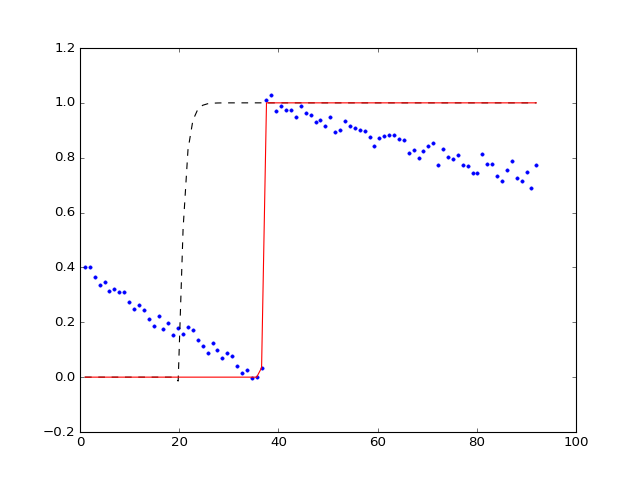

In [24]:
# result = gmodel.fit(mybragg, t=t, t0=30, sigma=0.5, alpha=-10.0) # it works with this initialization
result = gmodel.fit(mybragg, t=t, t0=20, sigma=0.1, alpha=-1.0, nan_policy='propagate') # and also with this one
#various nan errors were solved by addying the nan_policy

print(result.fit_report())

plt.plot(t, mybragg, 'b.')
plt.plot(t, result.init_fit, 'k--')
plt.plot(t, result.best_fit, 'r-')
plt.ylim(-0.2,1.2)
plt.show()

In [300]:
result.best_values


{'alpha': -0.26309482224588476,
 'sigma': 0.021140775487328334,
 't0': 35.983334914249539}